In [1]:
import numpy as np
import matplotlib.pylab as plt
import matplotlib
import xarray as xr

### Read the data

In [3]:
with xr.open_dataset('../data/modified_dataset.nc') as dset:
    station_labels = dset['station'].to_numpy()
    distance_labels = dset['distance'].to_numpy()
    species_labels = dset['species'].to_numpy()

unique_species = np.unique(species_labels)
unique_stations = np.unique(station_labels)

### Count the samples per species and station

In [4]:
# initialize counts with integer zeros
counts = np.zeros((len(unique_species), len(unique_stations)), dtype=int)
for i, species in enumerate(unique_species):

    where_species = species_labels == species

    for k, station in enumerate(unique_stations):

        where_station = station_labels == station
        where = np.logical_and(where_species, where_station)

        counts[i, k] = np.sum(where)

### Make Figure

Text(0, 0.5, 'Number of samples')

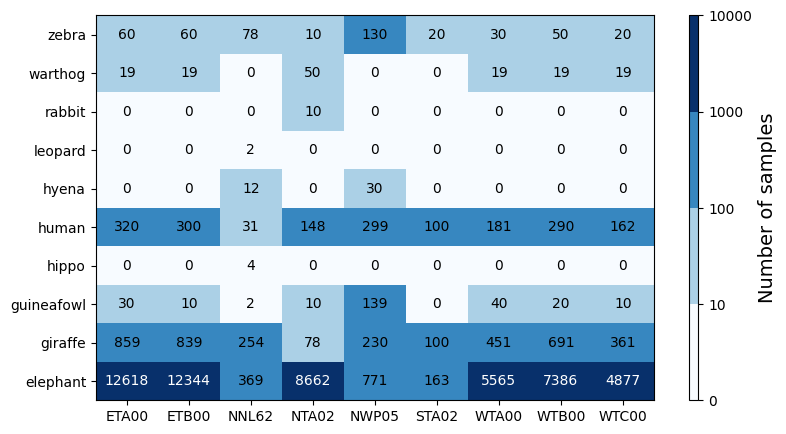

In [5]:
plt.figure(figsize=(len(unique_stations), 0.5*len(unique_species)))

# PARAMETERS FOR CREATING A DISCRETE COLORBAR FOR THE HISTOGRAM
bounds = [0,10,100,1000,10000]
cmap = plt.cm.Blues
norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)


# PLOTTING
plt.pcolormesh(np.arange(-0.5, counts.shape[1]), np.arange(-0.5, counts.shape[0]),counts,norm=norm,cmap=cmap)

for (i, j), val in np.ndenumerate(counts):
    plt.text(j, i, f'{val:.0f}', ha='center', va='center', color='white' if val > 1000 else 'black')

plt.xticks(ticks=np.arange(counts.shape[1]),labels=unique_stations)
plt.yticks(ticks=np.arange(counts.shape[0]),labels=unique_species)
cbar = plt.colorbar(cmap=cmap, norm=norm,ticks=bounds,boundaries=bounds,aspect=40)
cbar.ax.set_ylabel('Number of samples', fontsize=14)